<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/tb3py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example of using TB3Py https://github.com/usnistgov/tb3py/ and get wannier90_hr.dat file.

In [1]:
# Step 1: Download and extract Julia (change version if needed)
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.5-linux-x86_64.tar.gz
!tar -xvzf julia-1.11.5-linux-x86_64.tar.gz
!mv julia-1.11.5 /content/julia

# Step 2: Add Julia to current Python session PATH
import os
os.environ["PATH"] = "/content/julia/bin:" + os.environ["PATH"]

# Step 3: Check if Julia is available now
!which julia
!julia --version


Streaming output truncated to the last 5000 lines.
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/unlisted_targets.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/targets_not_a_table.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/target_entry_twice.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/compat_unlisted.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/repeated_uuid.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/bad_version2.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/deps_is_not_a_table.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/bad_deps_uuid.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/compat_not_a_table.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/bad_uuid2.toml
julia-1.11.5/share/julia/stdlib/v1.11/Pkg/test/project/bad/parse_error.toml
julia-1.11.

In [2]:
!julia -version

julia version 1.11.5


In [5]:
!julia -e 'using Pkg; Pkg.add(["ThreeBodyTB", "Plots"]); Pkg.precompile()'

Streaming output truncated to the last 5000 lines.
  ◒ Plots
  Progress [=======================================> ]  227/233
  ◐ LoopVectorization
  ◐ Plots
  Progress [=======================================> ]  227/233
  ◓ LoopVectorization
  ◓ Plots
  Progress [=======================================> ]  227/233
  ◑ LoopVectorization
  ◑ Plots
  Progress [=======================================> ]  227/233
  ◒ LoopVectorization
  ◒ Plots
  Progress [=======================================> ]  227/233
  ◐ LoopVectorization
  ◐ Plots
  Progress [=======================================> ]  227/233
  ◓ LoopVectorization
  ◓ Plots
  Progress [=======================================> ]  227/233
  ◑ LoopVectorization
  ◑ Plots
  Progress [=======================================> ]  227/233
  ◒ LoopVectorization
  ◒ Plots
  Progress [=======================================> ]  227/233
  ◐ LoopVectorization
  ◐ Plots
  Progress [=======================================> ]  227/233
  ◓ LoopVec

In [6]:
!pip install -q jarvis-tools spglib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 33.7 MB/s eta 0:00:00


In [7]:
import os

pos="""Si2
1.0
3.3641499856336465 -2.5027128e-09 1.94229273881412
1.121382991333525 3.1717517190189715 1.9422927388141193
-2.5909987e-09 -1.8321133e-09 3.884586486670313
Si
2
Cartesian
3.92483875 2.77528125 6.7980237500000005
0.56069125 0.39646875 0.9711462500000001
"""
pos="""C2
1.0
1.2320971008984494 -2.1340542301747005 0.0
1.2320971008984494 2.1340542301747005 0.0
0.0 0.0 30.803073
C
2
Cartesian
0.0 0.0 1.9507584231000183
1.2321 0.7113514226999862 1.9507584231000183
"""
with open("POSCAR","w") as f:
    f.write(pos)

lines="""using ThreeBodyTB
c = makecrys("POSCAR")
energy, tbc, flag = scf_energy(c);
println("directgap, indirectgap, gaptype, bandwidth",string(ThreeBodyTB.BandStruct.band_summary(tbc)),tbc.efermi)
write_hr_dat(tbc,filename="my_hr.dat")
"""
with open("input.jl","w") as f:
     f.write(lines)
#cmd = "!julia input.jl"
#os.system(cmd)

In [ ]:
!julia input.jl

┌ Warning: CHOLMOD version incompatibility
│ 
│ Julia was compiled with CHOLMOD version 4.0.4. It is
│ currently linked with version 5.3.0.
│ This might cause Julia to terminate when working with
│ sparse matrix factorizations, e.g. solving systems of
│ equations with \.
│ 
│ It is recommended that you use Julia with the same major
│ version of CHOLMOD as the one used during the build, or
│ download the generic binaries from www.julialang.org,
│ which ship with the correct versions of all dependencies.
└ @ SparseArrays.CHOLMOD /usr/local/share/julia/stdlib/v1.10/SparseArrays/src/solvers/cholmod.jl:206

found /root/.julia/packages/ThreeBodyTB/HW8CZ/src/../dats/pbesol/v1.3/els/coef.el.2bdy.C.xml.gz
Tuple{Symbol, Symbol}
found /root/.julia/packages/ThreeBodyTB/HW8CZ/src/../dats/pbesol/v1.3/els/coef.el.3bdy.C.xml.gz


START SCF ----------------
SCF CALC 0001 energy  -18.94188245    
SCF CALC 0002 energy  -18.94188245  en_diff:   0.000000E+00  dq_diff:   1.243450E-14   mix: 5.000000E-02 

Y

You can download my_hr.dat file by clicking on older icon on lef and download.

In [9]:
!ls

input.jl  julia  julia-1.11.5-linux-x86_64.tar.gz  POSCAR  sample_data


In [8]:
from jarvis.io.wannier.outputs import WannierHam
w = WannierHam(filename='my_hr.dat')

FileNotFoundError: [Errno 2] No such file or directory: 'my_hr.dat'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from jarvis.core.kpoints import generate_kgrid
kpoints = generate_kgrid([20, 20, 20])
energies, dos, pdos = w.dos(kpoints)
plt.plot(energies, dos)
plt.xlabel('E')
plt.ylabel('DOS')

In [ ]:
from jarvis.io.vasp.inputs import Poscar
atoms=Poscar.from_string(pos).atoms
filename='bands.png'
w.get_bandstructure_plot(atoms=atoms, filename=filename,yrange=[-8, 4])

/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


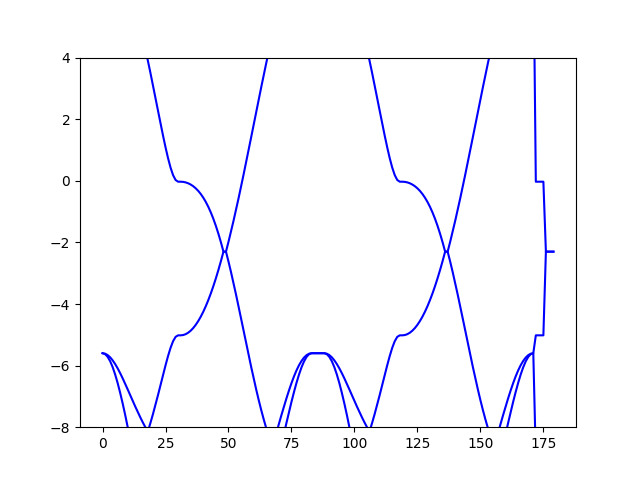

In [ ]:
from IPython.display import Image
Image('bands.png')

See also https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ThreeBodyTB_julia.ipynb